## Problem statement.
Understand how the bank approves and refuses the loan on certain applicants ,finding out the patterns to help bank and to reduce the financial loss.

### Importing the necessary libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows' ,300) 
pd.set_option('display.width', 1000)

In [2]:
##reading the csv files
NewApp = pd.read_csv("application_data.csv")
NewApp.head(5)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  \
0      100002       1         Cash loans           M            N               Y             0          202500.0    406597.5      24700.5         351000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.018801       -9461           -637            -3648.0            -2120          NaN           1               1                0                 1           1           0        Laborers              1.0                     2                            2                  WEDNESDAY                       10                           0                           0                            0                       0                       0                        0  Business Entity Type 3      0.083037      0.262949      0.139376          0.0247            0.0369                       0.9722           0.6192          0.0143           0.00         0.0690         0.0833         0.1250        0.0369   
1      100003       0         Cash loans           F            N               N             0          270000.0   1293502.5      35698.5        1129500.0          Family    State servant               Higher education               Married  House / apartment                    0.003541      -16765          -1188            -1186.0             -291          NaN           1               1                0                 1           1           0      Core staff              2.0                     1                            1                     MONDAY                       11                           0                           0                            0                       0                       0                        0                  School      0.311267      0.622246           NaN          0.0959            0.0529                       0.9851           0.7960          0.0605           0.08         0.0345         0.2917         0.3333        0.0130   
2      100004       0    Revolving loans           M            Y               Y             0           67500.0    135000.0       6750.0         135000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.010032      -19046           -225            -4260.0            -2531         26.0           1               1                1                 1           1           0        Laborers              1.0                     2                            2                     MONDAY                        9                           0                           0                            0                       0                       0                        0              Government           NaN      0.555912      0.729567             NaN               NaN                          NaN              NaN             NaN            NaN            NaN            NaN            NaN           NaN   
3      100006       0         Cash loans           F           

In [3]:
##inspecting the number of rows and columns of the datset
NewApp.shape

(307511, 122)

In [4]:
NewApp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [5]:
NewApp.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE     FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY   EXT_SOURCE_1  EXT_SOURCE_2   EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG   LANDAREA_AVG  LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  APARTMENTS_MODE  BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  YEARS_BUILD_MODE  COMMONAREA_MODE  ELEVATORS_MODE  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05  3.075110e+05  307499.000000     3.072330e+05               307511.000000  307511.000000  307511.000000      307511.000000    307511.000000  104582.000000  307511.000000   307511.000000    307511.000000     307511.000000  307511.000000  307511.000000    307509.000000         307511.000000                307511.000000            307511.000000               307511.000000               307511.000000                307511.000000           307511.000000           307511.000000            307511.000000  134133.000000  3.068510e+05  246546.000000    151450.00000     127568.000000                157504.000000    103023.000000    92646.000000  143620.000000  152683.000000  154491.000000   98869.000000  124921.000000          97312.000000   153161.000000             93997.000000      137829.000000    151450.000000      127568.000000                 157504.000000     103023.000000     92646.000000   143620.000000   
mean   278180.518577       0.080729       0.417052      1.687979e+05  5.990260e+05   27108.573909     5.383962e+05                    0.020868  -16036.995067   63815.045904       -4986.120328     -2994.202373      12.061091       0.999997        0.819889         0.199368          0.998133       0.281066       0.056720         2.152665              2.052463                     2.031521                12.063419                    0.015144                    0.050769                     0.040659                0.078173                0.230454                 0.179555       0.502130  5.143927e-01       0.510853         0.11744          0.088442                     0.977735         0.752471        0.044621       0.078942       0.149725       0.226282       0.231894       0.066333              0.100775        0.107399                 0.008809           0.028358         0.114231           0.087543                      0.977065          0.759637         0.042553        0.074490   
std    102790.175348       0.272419       0.722121      2.371231e+05  4.024908e+05   14493.737315     3.694465e+05                    0.013831    4363.988632  141275.766519        3522.886321      1509.450419      11.944812       0.001803        0.384280         0.399526          0.043164       0.449521       0.231307         0.910682              0.509034                     0.502737                 3.265832                    0.122126                    0.219526                     0.197499                0.268444                0.421124                 0.383817       0.211062  1.910602e-01       0.194844         0.10824          0.082438                     0.059223         0.113280        0.076036       0.134576       0.100049       0.144641       0.161380       0.081184              0.092576        0.110565                 0.047732           0.069523         0.107936           0.084307                      0.064575          0.110111         0.074445        0.132256   
min    100002.000000       0.000000       0.000000      2.

### Previous Application Data check

In [6]:
PrevApp = pd.read_csv("previous_application.csv")
PrevApp.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL
0     2030495      271877     Consumer loans     1730.430          17145.0     17145.0               0.0          17145.0                   SATURDAY                       15                           Y                       1                0.0               0.182832                  0.867336                    XAP             Approved            -73  Cash through the bank                XAP              NaN         Repeater              Mobile            POS               XNA             Country-wide                35         Connectivity         12.0           middle  POS mobile with interest            365243.0           -42.0                      300.0          -42.0             -37.0                        0.0
1     2802425      108129         Cash loans    25188.615         607500.0    679671.0               NaN         607500.0                   THURSDAY                       11                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -164                    XNA                XAP    Unaccompanied         Repeater                 XNA           Cash            x-sell           Contact center                -1                  XNA         36.0       low_action          Cash X-Sell: low            365243.0          -134.0                      916.0       365243.0          365243.0                        1.0
2     2523466      122040         Cash loans    15060.735         112500.0    136444.5               NaN         112500.0                    TUESDAY                       11                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -301  Cash through the bank                XAP  Spouse, partner         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA         12.0             high         Cash X-Sell: high            365243.0          -271.0                       59.0       365243.0          365243.0                        1.0
3     2819243      176158         Cash loans    47041.335         450000.0    470790.0               NaN         450000.0                     MONDAY                        7                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -512  Cash through the bank                XAP              NaN         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA         12.0           middle       Cash X-Sell: middle            365243.0          -482.0                     -152.0         -182.0            -177.0                        1.0
4     1784265      202054         Cash loans    31924.395         337500.0    404055.0               NaN         337500.0                   THURSDAY                        9                           Y                       1                NaN                    NaN                       NaN                Repairs              Refused           -781  Cash through the bank   

In [7]:
PrevApp.shape

(1670214, 37)

In [8]:
PrevApp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [9]:
PrevApp.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION    AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06  1.670213e+06      7.743700e+05     1.284699e+06             1.670214e+06            1.670214e+06      774370.000000            5951.000000               5951.000000   1.670214e+06      1.670214e+06  1.297984e+06       997149.000000   997149.000000              997149.000000  997149.000000     997149.000000              997149.000000
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05  1.961140e+05      6.697402e+03     2.278473e+05             1.248418e+01            9.964675e-01           0.079637               0.188357                  0.773503  -8.806797e+02      3.139511e+02  1.605408e+01       342209.855039    13826.269337               33767.774054   76582.403064      81992.343838                   0.332570
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05  3.185746e+05      2.092150e+04     3.153966e+05             3.334028e+00            5.932963e-02           0.107823               0.087671                  0.100879   7.790997e+02      7.127443e+03  1.456729e+01        88916.115834    72444.869708              106857.034789  149647.415123     153303.516729                   0.471134
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00  0.000000e+00     -9.000000e-01     0.000000e+00             0.000000e+00            0.000000e+00          -0.000015               0.034781                  0.373150  -2.922000e+03     -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000               -2801.000000   -2889.000000      -2874.000000                   0.000000
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04  2.416050e+04      0.000000e+00     5.084100e+04             1.000000e+01            1.000000e+00           0.000000               0.160716                  0.715645  -1.300000e+03     -1.000000e+00  6.000000e+00       365243.000000    -1628.000000               -1242.000000   -1314.000000      -1270.000000                   0.000000
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04  8.054100e+04      1.638000e+03     1.123200e+05             1.200000e+01            1.000000e+00           0.051605               0.189122                  0.835095  -5.810000e+02      3.000000e+00  1.200000e+01       365243.000000     -831.000000                -361.000000    -537.000000       -499.000000                   0.000000
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05  2.164185e+05      7.740000e+03     2.340000e+05             1.500000e+01            1.000000e+00           0.108909               0.193330                  0.852537  -2.800000e+02      8.200000e+01  2.400000e+01       365243.000000     -411.000000                 129.000000     -74.000000        -44.000000                   1.000000
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06  6.905160e+06      3.060045e+06     6.905160e+06             2.300000e+01            1.000000e+00           1.000000               1.000000                  1.000000  -1.000000e+00      4.000000e+06  8.400000e+01       365243.000000   365243.000000              365243.000000  365243.000000     365243.000000                   1.000000

## Data cleaning for NewApp


In [10]:
# finding the  % of missing values in all columns
round(NewApp.isnull().mean()*100).sort_values(ascending = False)

COMMONAREA_MODE                 70.0
COMMONAREA_AVG                  70.0
COMMONAREA_MEDI                 70.0
NONLIVINGAPARTMENTS_MODE        69.0
NONLIVINGAPARTMENTS_AVG         69.0
NONLIVINGAPARTMENTS_MEDI        69.0
LIVINGAPARTMENTS_MEDI           68.0
LIVINGAPARTMENTS_AVG            68.0
FLOORSMIN_MODE                  68.0
FLOORSMIN_AVG                   68.0
LIVINGAPARTMENTS_MODE           68.0
FONDKAPREMONT_MODE              68.0
FLOORSMIN_MEDI                  68.0
YEARS_BUILD_MEDI                66.0
OWN_CAR_AGE                     66.0
YEARS_BUILD_MODE                66.0
YEARS_BUILD_AVG                 66.0
LANDAREA_MEDI                   59.0
LANDAREA_MODE                   59.0
BASEMENTAREA_MODE               59.0
BASEMENTAREA_MEDI               59.0
BASEMENTAREA_AVG                59.0
LANDAREA_AVG                    59.0
EXT_SOURCE_1                    56.0
NONLIVINGAREA_AVG               55.0
NONLIVINGAREA_MEDI              55.0
NONLIVINGAREA_MODE              55.0
E

In [11]:
### removing the columns with more than 50% of missing values
NewApp = NewApp.loc[:,NewApp.isnull().mean()<=0.5]
NewApp.shape

(307511, 81)

In [12]:
###randomly checking the AMT_REQ_CREDIT_BUREAU_YEAR  column having missing values
NewApp[NewApp.AMT_REQ_CREDIT_BUREAU_YEAR .isna()]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL     OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  YEARS_BEGINEXPLUATATION_AVG  FLOORSMAX_AVG  YEARS_BEGINEXPLUATATION_MODE  FLOORSMAX_MODE  YEARS_BEGINEXPLUATATION_MEDI  FLOORSMAX_MEDI  TOTALAREA_MODE EMERGENCYSTATE_MODE  OBS_30_CNT_SOCIAL_CIRCLE  \
3           100006       0         Cash loans           F            N               Y             0          135000.0    312682.5      29686.5         297000.0   Unaccompanied               Working  Secondary / secondary special        Civil marriage  House / apartment                    0.008019      -19005          -3039            -9833.0            -2437           1               1                0                 1           0           0            Laborers              2.0                     2                            2                  WEDNESDAY                       17                           0                           0                            0                       0                       0                        0  Business Entity Type 3      0.650442           NaN                          NaN            NaN                           NaN             NaN                           NaN             NaN             NaN                 NaN                       2.0   
9           100012       0    Revolving loans           M            N               Y             0          135000.0    405000.0      20250.0         405000.0   Unaccompanied               Working  Secondary / secondary special  Single / not married  House / apartment                    0.019689      -14469          -2019           -14437.0            -3992           1               1                0                 1           0           0            Laborers              1.0                     2                            2                   THURSDAY                        8                           0                           0                            0                       0                       0                        0             Electricity      0.746644           NaN                          NaN            NaN                           NaN             NaN                           NaN             NaN             NaN                 NaN                       2.0   
14          100018       0         Cash loans           F            N               Y             0          189000.0    773680.5      32778.0         679500.0   Unaccompanied               Working  Secondary / secondary special               Married  House / apartment                    0.010006      -14583           -203             -615.0            -2056           1               1                0                 1           0           0            Laborers              2.0                     2                            1                     MONDAY                        9                           0                           0                            0                       0                       0                        0       Transport: type 2      0.642656           NaN                       0.9985         0.6667                        0.9985          0.6667                        0.9985          0.6667          0.3811                  No                       0.0   
17      

In [13]:
###selecting the columns with less than 14% and greater than 0% of missing values
Newcol = NewApp.columns[(NewApp.isnull().mean()<=0.14) & (NewApp.isnull().mean()>0)]
Newcol


Index(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'], dtype='object')

In [14]:
###columns which are less than 14% of missing values

Newcol.shape

(16,)

In [15]:
NewApp['AMT_ANNUITY'].value_counts()

9000.0     6385
13500.0    5514
6750.0     2279
10125.0    2035
37800.0    1602
           ... 
4635.0        1
65209.5       1
70920.0       1
85792.5       1
51331.5       1
Name: AMT_ANNUITY, Length: 13672, dtype: int64

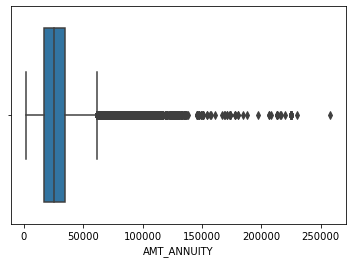

In [16]:
### AMT_ANNUITY is a continuous variable checking for outlier through boxplot

sns.boxplot(NewApp.AMT_ANNUITY)
plt.show()

In [17]:
## outliers are seen so column can be imputed by median of the column
NewApp.AMT_ANNUITY.describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [18]:
imputVAL = round(NewApp['AMT_ANNUITY'].median())
print(f'Since AMT_ANNUITY has outliers, the column can be imputed by median of the column  {imputVAL}')

Since AMT_ANNUITY has outliers, the column can be imputed by median of the column  24903


In [19]:

NewApp.AMT_GOODS_PRICE.value_counts()


450000.0     26022
225000.0     25282
675000.0     24962
900000.0     15416
270000.0     11428
             ...  
592452.0         1
1130125.5        1
362632.5         1
498856.5         1
1271875.5        1
Name: AMT_GOODS_PRICE, Length: 1002, dtype: int64

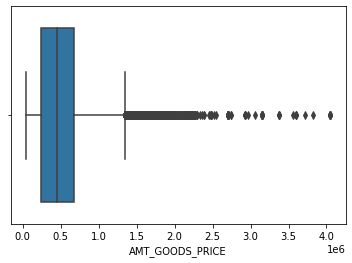

In [20]:
### AMT_GOODS_PRICE is a continuous variable checking for outlier through boxplot

sns.boxplot(NewApp.AMT_GOODS_PRICE)
plt.show()

In [21]:
NewApp.AMT_GOODS_PRICE.describe()


count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [22]:
imputVAL = round(NewApp['AMT_GOODS_PRICE'].median())
print(f'Since AMT_ANNUITY has outliers, the column can be imputed by median of the column  {imputVAL}')

Since AMT_ANNUITY has outliers, the column can be imputed by median of the column  450000


In [23]:
NewApp.NAME_TYPE_SUITE.value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [24]:
###replcing the categorical variables with the most occured variable i.e mode

imputVAL = NewApp['NAME_TYPE_SUITE'].mode()
print(f'Since NAME_TYPE_SUITE is categorical the column can be imputed by mode of the column  {imputVAL}')

Since NAME_TYPE_SUITE is categorical the column can be imputed by mode of the column  0    Unaccompanied
dtype: object


In [25]:
NewApp.CNT_FAM_MEMBERS.value_counts()

2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
16.0         2
14.0         2
20.0         2
12.0         2
15.0         1
11.0         1
13.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

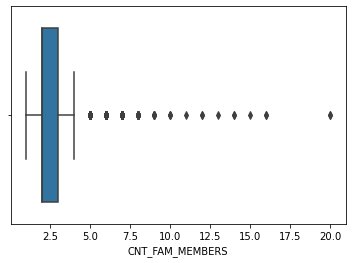

In [26]:
sns.boxplot(NewApp.CNT_FAM_MEMBERS)
plt.show()

In [27]:
###outliers are der so can be imputed by the medain of the column.

NewApp.CNT_FAM_MEMBERS.describe()

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

In [28]:
imputVAL = round(NewApp['CNT_FAM_MEMBERS'].median())
print(f'CNT_FAM_MEMBERS has outliers, the column can be imputed by median of the column  {imputVAL}')

CNT_FAM_MEMBERS has outliers, the column can be imputed by median of the column  2


In [29]:
NewApp.EXT_SOURCE_2.value_counts()

0.285898    721
0.262258    417
0.265256    343
0.159679    322
0.265312    306
           ... 
0.157007      1
0.721955      1
0.032513      1
0.204329      1
0.064909      1
Name: EXT_SOURCE_2, Length: 119831, dtype: int64

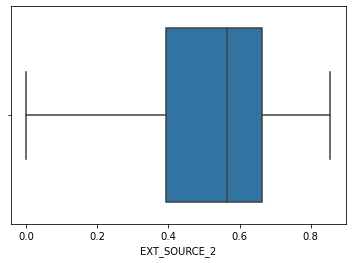

In [30]:
sns.boxplot(NewApp.EXT_SOURCE_2)
plt.show()

In [31]:
print("no outliers found")

no outliers found


In [32]:
NewApp.OBS_30_CNT_SOCIAL_CIRCLE.value_counts()

0.0      163910
1.0       48783
2.0       29808
3.0       20322
4.0       14143
5.0        9553
6.0        6453
7.0        4390
8.0        2967
9.0        2003
10.0       1376
11.0        852
12.0        652
13.0        411
14.0        258
15.0        166
16.0        133
17.0         88
18.0         46
19.0         44
20.0         30
21.0         29
22.0         22
23.0         15
24.0         11
25.0         11
27.0          5
26.0          3
30.0          2
348.0         1
28.0          1
47.0          1
29.0          1
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: int64

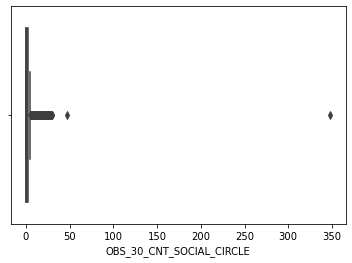

In [33]:
sns.boxplot(NewApp.OBS_30_CNT_SOCIAL_CIRCLE)
plt.show()

In [34]:
NewApp.OBS_30_CNT_SOCIAL_CIRCLE.describe()

count    306490.000000
mean          1.422245
std           2.400989
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [35]:
imputVAL = round(NewApp['OBS_30_CNT_SOCIAL_CIRCLE'].mean())
print(f'OBS_30_CNT_SOCIAL_CIRCLE has outliers, the column can be imputed by median of the column  {imputVAL}')

OBS_30_CNT_SOCIAL_CIRCLE has outliers, the column can be imputed by median of the column  1


In [36]:
NewApp.DEF_30_CNT_SOCIAL_CIRCLE.value_counts()

0.0     271324
1.0      28328
2.0       5323
3.0       1192
4.0        253
5.0         56
6.0         11
8.0          1
7.0          1
34.0         1
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: int64

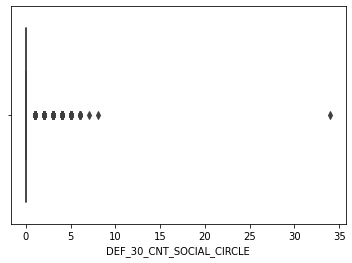

In [37]:
sns.boxplot(NewApp.DEF_30_CNT_SOCIAL_CIRCLE)
plt.show()

In [38]:
NewApp.DEF_30_CNT_SOCIAL_CIRCLE.describe()

count    306490.000000
mean          0.143421
std           0.446698
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [39]:
print(" DEF_30_CNT_SOCIAL_CIRCLE has negligible outliers but can be ignored")

 DEF_30_CNT_SOCIAL_CIRCLE has negligible outliers but can be ignored


In [40]:
NewApp.shape

(307511, 81)

In [41]:
Newcol.shape

(16,)

In [42]:
###making the columns more readable

NewApp.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [43]:
NewApp['CODE_GENDER'].replace(['M','F'],['Male','Female'],inplace=True)
NewApp.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  YEARS_BEGINEXPLUATATION_AVG  FLOORSMAX_AVG  YEARS_BEGINEXPLUATATION_MODE  FLOORSMAX_MODE  YEARS_BEGINEXPLUATATION_MEDI  FLOORSMAX_MEDI  TOTALAREA_MODE EMERGENCYSTATE_MODE  OBS_30_CNT_SOCIAL_CIRCLE  \
0      100002       1         Cash loans        Male            N               Y             0          202500.0    406597.5      24700.5         351000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.018801       -9461           -637            -3648.0            -2120           1               1                0                 1           1           0        Laborers              1.0                     2                            2                  WEDNESDAY                       10                           0                           0                            0                       0                       0                        0  Business Entity Type 3      0.262949      0.139376                       0.9722         0.0833                        0.9722          0.0833                        0.9722          0.0833          0.0149                  No                       2.0   
1      100003       0         Cash loans      Female            N               N             0          270000.0   1293502.5      35698.5        1129500.0          Family    State servant               Higher education               Married  House / apartment                    0.003541      -16765          -1188            -1186.0             -291           1               1                0                 1           1           0      Core staff              2.0                     1                            1                     MONDAY                       11                           0                           0                            0                       0                       0                        0                  School      0.622246           NaN                       0.9851         0.2917                        0.9851          0.2917                        0.9851          0.2917          0.0714                  No                       1.0   
2      100004       0    Revolving loans        Male            Y               Y             0           67500.0    135000.0       6750.0         135000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.010032      -19046           -225            -4260.0            -2531           1               1                1                 1           1           0        Laborers              1.0                     2                            2                     MONDAY                        9                           0                           0                            0                       0                       0                        0              Government      0.555912      0.729567                          NaN            NaN                           NaN             NaN                           NaN             NaN             NaN                 NaN                       0.0   
3      100006       0         Cash loans      Female       

In [44]:
print("The CODE_GENDER column is replaced from M & F to Male and Female")

The CODE_GENDER column is replaced from M & F to Male and Female


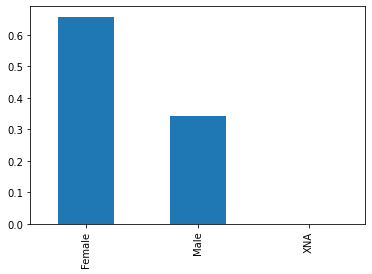

In [45]:
###plot a bar graph for gender column
###since XNA is negligilbe we can ignore that.
NewApp.CODE_GENDER.value_counts(normalize = True).plot.bar()
plt.show()

In [46]:
NewApp.DAYS_BIRTH.describe()

count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

In [47]:
###since there are negative values in DAYS BIRTH Column so to make it more readble creating another column age where -ve values 
###are removed and days are converted into age(years) of a person

NewApp['AGE'] = np.ceil(NewApp.DAYS_BIRTH / -365)
NewApp.AGE.describe()

count    307511.000000
mean         44.433090
std          11.954493
min          21.000000
25%          35.000000
50%          44.000000
75%          54.000000
max          70.000000
Name: AGE, dtype: float64

In [48]:
### to check whether age column is added

NewApp.head(3)



SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  YEARS_BEGINEXPLUATATION_AVG  FLOORSMAX_AVG  YEARS_BEGINEXPLUATATION_MODE  FLOORSMAX_MODE  YEARS_BEGINEXPLUATATION_MEDI  FLOORSMAX_MEDI  TOTALAREA_MODE EMERGENCYSTATE_MODE  OBS_30_CNT_SOCIAL_CIRCLE  \
0      100002       1         Cash loans        Male            N               Y             0          202500.0    406597.5      24700.5         351000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.018801       -9461           -637            -3648.0            -2120           1               1                0                 1           1           0        Laborers              1.0                     2                            2                  WEDNESDAY                       10                           0                           0                            0                       0                       0                        0  Business Entity Type 3      0.262949      0.139376                       0.9722         0.0833                        0.9722          0.0833                        0.9722          0.0833          0.0149                  No                       2.0   
1      100003       0         Cash loans      Female            N               N             0          270000.0   1293502.5      35698.5        1129500.0          Family    State servant               Higher education               Married  House / apartment                    0.003541      -16765          -1188            -1186.0             -291           1               1                0                 1           1           0      Core staff              2.0                     1                            1                     MONDAY                       11                           0                           0                            0                       0                       0                        0                  School      0.622246           NaN                       0.9851         0.2917                        0.9851          0.2917                        0.9851          0.2917          0.0714                  No                       1.0   
2      100004       0    Revolving loans        Male            Y               Y             0           67500.0    135000.0       6750.0         135000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.010032      -19046           -225            -4260.0            -2531           1               1                1                 1           1           0        Laborers              1.0                     2                            2                     MONDAY                        9                           0                           0                            0                       0                       0                        0              Government      0.555912      0.729567                          NaN            NaN                           NaN             NaN                           NaN             NaN             NaN                 NaN                       0.0   

   DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF

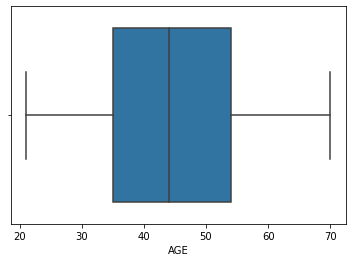

In [49]:
###to check for outliers

sns.boxplot(NewApp['AGE'])
plt.show()

In [50]:
print(f' NO OUTLIERS FOUND FOR AGE COLUMN')

 NO OUTLIERS FOUND FOR AGE COLUMN


In [51]:
#### converting days_employed column to work experience column 

NewApp['EXPERIENCED'] =np.ceil(NewApp.DAYS_EMPLOYED /-365)
NewApp.EXPERIENCED.describe()

count    307511.000000
mean       -174.303742
std         386.994347
min       -1000.000000
25%           1.000000
50%           4.000000
75%           8.000000
max          50.000000
Name: EXPERIENCED, dtype: float64

In [52]:
###der are some negative values , checking for that 

NewApp[NewApp['EXPERIENCED']<0] .EXPERIENCED.value_counts()

-1000.0    55374
Name: EXPERIENCED, dtype: int64

In [53]:
#### all the negative values are same for the experience column so they can be standardise by some NAN values
NewApp.loc[NewApp['EXPERIENCED'] < 0, 'EXPERIENCED'] = np.NaN
NewApp.loc[NewApp['EXPERIENCED'] < 0, 'EXPERIENCED'].value_counts()


Series([], Name: EXPERIENCED, dtype: int64)

In [54]:
NewApp.head(10)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  YEARS_BEGINEXPLUATATION_AVG  FLOORSMAX_AVG  YEARS_BEGINEXPLUATATION_MODE  FLOORSMAX_MODE  YEARS_BEGINEXPLUATATION_MEDI  FLOORSMAX_MEDI  TOTALAREA_MODE EMERGENCYSTATE_MODE  OBS_30_CNT_SOCIAL_CIRCLE  \
0      100002       1         Cash loans        Male            N               Y             0          202500.0    406597.5      24700.5         351000.0    Unaccompanied               Working  Secondary / secondary special  Single / not married  House / apartment                    0.018801       -9461           -637            -3648.0            -2120           1               1                0                 1           1           0        Laborers              1.0                     2                            2                  WEDNESDAY                       10                           0                           0                            0                       0                       0                        0  Business Entity Type 3      0.262949      0.139376                       0.9722         0.0833                        0.9722          0.0833                        0.9722          0.0833          0.0149                  No                       2.0   
1      100003       0         Cash loans      Female            N               N             0          270000.0   1293502.5      35698.5        1129500.0           Family         State servant               Higher education               Married  House / apartment                    0.003541      -16765          -1188            -1186.0             -291           1               1                0                 1           1           0      Core staff              2.0                     1                            1                     MONDAY                       11                           0                           0                            0                       0                       0                        0                  School      0.622246           NaN                       0.9851         0.2917                        0.9851          0.2917                        0.9851          0.2917          0.0714                  No                       1.0   
2      100004       0    Revolving loans        Male            Y               Y             0           67500.0    135000.0       6750.0         135000.0    Unaccompanied               Working  Secondary / secondary special  Single / not married  House / apartment                    0.010032      -19046           -225            -4260.0            -2531           1               1                1                 1           1           0        Laborers              1.0                     2                            2                     MONDAY                        9                           0                           0                            0                       0                       0                        0              Government      0.555912      0.729567                          NaN            NaN                           NaN             NaN                           NaN             NaN             NaN                 NaN                       0.0   
3      100006       0         Cash 

In [55]:
NewApp.NAME_FAMILY_STATUS.value_counts()

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

In [56]:
###to make ease for the column converting civil marriage to arried and single, not married to Single

NewApp["NAME_FAMILY_STATUS"].replace({"Civil marriage": "Married", "Single / not married": "Single"}, inplace=True)


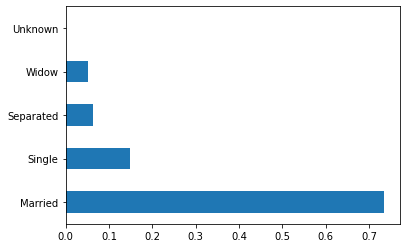

In [57]:
NewApp.NAME_FAMILY_STATUS.value_counts(normalize = True).plot.barh()
plt.show()

In [58]:
###it is updated
NewApp.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  YEARS_BEGINEXPLUATATION_AVG  FLOORSMAX_AVG  YEARS_BEGINEXPLUATATION_MODE  FLOORSMAX_MODE  YEARS_BEGINEXPLUATATION_MEDI  FLOORSMAX_MEDI  TOTALAREA_MODE EMERGENCYSTATE_MODE  OBS_30_CNT_SOCIAL_CIRCLE  \
0      100002       1         Cash loans        Male            N               Y             0          202500.0    406597.5      24700.5         351000.0   Unaccompanied          Working  Secondary / secondary special             Single  House / apartment                    0.018801       -9461           -637            -3648.0            -2120           1               1                0                 1           1           0        Laborers              1.0                     2                            2                  WEDNESDAY                       10                           0                           0                            0                       0                       0                        0  Business Entity Type 3      0.262949      0.139376                       0.9722         0.0833                        0.9722          0.0833                        0.9722          0.0833          0.0149                  No                       2.0   
1      100003       0         Cash loans      Female            N               N             0          270000.0   1293502.5      35698.5        1129500.0          Family    State servant               Higher education            Married  House / apartment                    0.003541      -16765          -1188            -1186.0             -291           1               1                0                 1           1           0      Core staff              2.0                     1                            1                     MONDAY                       11                           0                           0                            0                       0                       0                        0                  School      0.622246           NaN                       0.9851         0.2917                        0.9851          0.2917                        0.9851          0.2917          0.0714                  No                       1.0   
2      100004       0    Revolving loans        Male            Y               Y             0           67500.0    135000.0       6750.0         135000.0   Unaccompanied          Working  Secondary / secondary special             Single  House / apartment                    0.010032      -19046           -225            -4260.0            -2531           1               1                1                 1           1           0        Laborers              1.0                     2                            2                     MONDAY                        9                           0                           0                            0                       0                       0                        0              Government      0.555912      0.729567                          NaN            NaN                           NaN             NaN                           NaN             NaN             NaN                 NaN                       0.0   
3      100006       0         Cash loans      Female            N      

In [59]:
###Analyzing THE contract type..

NewApp.NAME_CONTRACT_TYPE.value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

## Previous Application analysis

In [60]:
PrevApp.shape

(1670214, 37)

In [61]:
PrevApp.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL
0     2030495      271877     Consumer loans     1730.430          17145.0     17145.0               0.0          17145.0                   SATURDAY                       15                           Y                       1                0.0               0.182832                  0.867336                    XAP             Approved            -73  Cash through the bank                XAP              NaN         Repeater              Mobile            POS               XNA             Country-wide                35         Connectivity         12.0           middle  POS mobile with interest            365243.0           -42.0                      300.0          -42.0             -37.0                        0.0
1     2802425      108129         Cash loans    25188.615         607500.0    679671.0               NaN         607500.0                   THURSDAY                       11                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -164                    XNA                XAP    Unaccompanied         Repeater                 XNA           Cash            x-sell           Contact center                -1                  XNA         36.0       low_action          Cash X-Sell: low            365243.0          -134.0                      916.0       365243.0          365243.0                        1.0
2     2523466      122040         Cash loans    15060.735         112500.0    136444.5               NaN         112500.0                    TUESDAY                       11                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -301  Cash through the bank                XAP  Spouse, partner         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA         12.0             high         Cash X-Sell: high            365243.0          -271.0                       59.0       365243.0          365243.0                        1.0
3     2819243      176158         Cash loans    47041.335         450000.0    470790.0               NaN         450000.0                     MONDAY                        7                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -512  Cash through the bank                XAP              NaN         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA         12.0           middle       Cash X-Sell: middle            365243.0          -482.0                     -152.0         -182.0            -177.0                        1.0
4     1784265      202054         Cash loans    31924.395         337500.0    404055.0               NaN         337500.0                   THURSDAY                        9                           Y                       1                NaN                    NaN                       NaN                Repairs              Refused           -781  Cash through the bank   

In [62]:
round(PrevApp.isnull().mean()*100).sort_values(ascending = False)

RATE_INTEREST_PRIVILEGED       100.0
RATE_INTEREST_PRIMARY          100.0
RATE_DOWN_PAYMENT               54.0
AMT_DOWN_PAYMENT                54.0
NAME_TYPE_SUITE                 49.0
NFLAG_INSURED_ON_APPROVAL       40.0
DAYS_FIRST_DRAWING              40.0
DAYS_FIRST_DUE                  40.0
DAYS_LAST_DUE_1ST_VERSION       40.0
DAYS_LAST_DUE                   40.0
DAYS_TERMINATION                40.0
AMT_GOODS_PRICE                 23.0
AMT_ANNUITY                     22.0
CNT_PAYMENT                     22.0
SELLERPLACE_AREA                 0.0
NAME_PRODUCT_TYPE                0.0
CHANNEL_TYPE                     0.0
NAME_YIELD_GROUP                 0.0
NAME_SELLER_INDUSTRY             0.0
NAME_GOODS_CATEGORY              0.0
PRODUCT_COMBINATION              0.0
NAME_PORTFOLIO                   0.0
SK_ID_PREV                       0.0
NAME_CLIENT_TYPE                 0.0
CODE_REJECT_REASON               0.0
SK_ID_CURR                       0.0
DAYS_DECISION                    0.0
N

In [63]:
PrevApp.NAME_CONTRACT_STATUS.value_counts(normalize=True)*100

Approved        62.074740
Canceled        18.938831
Refused         17.403638
Unused offer     1.582791
Name: NAME_CONTRACT_STATUS, dtype: float64

In [64]:
PrevApp.FLAG_LAST_APPL_PER_CONTRACT.value_counts(normalize=True)

Y    0.994926
N    0.005074
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: float64

In [65]:
PrevApp.NFLAG_LAST_APPL_IN_DAY.value_counts(normalize=True)

1    0.996468
0    0.003532
Name: NFLAG_LAST_APPL_IN_DAY, dtype: float64

In [66]:
##Dropping duplicates

PrevApp = PrevApp.sort_values('SK_ID_PREV', ascending=False).drop_duplicates('SK_ID_CURR')


In [67]:
PrevApp[PrevApp.DAYS_TERMINATION > 0].head()


SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_TYPE_SUITE NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA  NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP             PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL
888701      2843497      451578         Cash loans     9175.185        132482.97   149969.97               NaN        132482.97                  WEDNESDAY                       11                           Y                       0                NaN                    NaN                       NaN                    XNA             Approved           -618  Cash through the bank                XAP             NaN         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                   XNA         24.0           middle             Cash Street: middle            365243.0          -588.0                      102.0       365243.0          365243.0                        1.0
1345642     2843496      425374    Revolving loans    31500.000        630000.00   630000.00               NaN        630000.00                   THURSDAY                       15                           Y                       1                NaN                    NaN                       NaN                    XAP             Approved           -465                    XNA                XAP   Unaccompanied         Repeater                 XNA          Cards            x-sell  Credit and cash offices                -1                   XNA          0.0              XNA                     Card X-Sell              -454.0          -423.0                   365243.0       365243.0          365243.0                        0.0
298226      2843493      337804    Revolving loans     2250.000         45000.00    45000.00               NaN         45000.00                   THURSDAY                       17                           Y                       1                NaN                    NaN                       NaN                    XAP             Approved           -459                    XNA                XAP   Unaccompanied         Repeater                 XNA          Cards           walk-in  Credit and cash offices                -1                   XNA          0.0              XNA                     Card Street              -438.0          -410.0                   365243.0       365243.0          365243.0                        0.0
1489940     2843491      107385         Cash loans    25421.985        841500.00   963684.00               NaN        841500.00                     FRIDAY                       12                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -304  Cash through the bank                XAP   Unaccompanied         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                   XNA         60.0       low_action                Cash X-Sell: low            365243.0          -274.0                     1496.0       365243.0          365243.0                        1.0
728908      2843487      424008     Consumer loans     7179.795         78402.87    78399.00              3.87         78402.87                     FRIDAY                       15                           Y                       1           0.000054                    NaN                       NaN                    XAP  

In [68]:
temp_prev = PrevApp[['SK_ID_CURR', 'AMT_CREDIT', 'NAME_CONTRACT_STATUS', 'CODE_REJECT_REASON', 'NAME_YIELD_GROUP', 'DAYS_TERMINATION']]
temp_prev.head()

SK_ID_CURR  AMT_CREDIT NAME_CONTRACT_STATUS CODE_REJECT_REASON NAME_YIELD_GROUP  DAYS_TERMINATION
205485      406596    30912.75         Unused offer             CLIENT              XNA               NaN
717142      140761    41499.00         Unused offer             CLIENT              XNA               NaN
886179      237546    60673.50              Refused              LIMIT           middle               NaN
359118      100125    59503.50              Refused                SCO           middle               NaN
70058       250234   108180.00              Refused                SCO       low_action               NaN

In [69]:
temp_prev.DAYS_TERMINATION.value_counts()

 365243.0    56079
-9.0           219
-15.0          219
-144.0         218
-17.0          217
             ...  
-2774.0          1
-2709.0          1
-2777.0          1
-2783.0          1
-2733.0          1
Name: DAYS_TERMINATION, Length: 2785, dtype: int64

In [70]:
temp_prev.DAYS_TERMINATION[temp_prev.DAYS_TERMINATION > 0].value_counts()

365243.0    56079
Name: DAYS_TERMINATION, dtype: int64

In [71]:
NewApp = pd.merge(left=NewApp,right=temp_prev, how='left', left_on='SK_ID_CURR', right_on='SK_ID_CURR')
NewApp.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  YEARS_BEGINEXPLUATATION_AVG  FLOORSMAX_AVG  YEARS_BEGINEXPLUATATION_MODE  FLOORSMAX_MODE  YEARS_BEGINEXPLUATATION_MEDI  FLOORSMAX_MEDI  TOTALAREA_MODE EMERGENCYSTATE_MODE  OBS_30_CNT_SOCIAL_CIRCLE  \
0      100002       1         Cash loans        Male            N               Y             0          202500.0      406597.5      24700.5         351000.0   Unaccompanied          Working  Secondary / secondary special             Single  House / apartment                    0.018801       -9461           -637            -3648.0            -2120           1               1                0                 1           1           0        Laborers              1.0                     2                            2                  WEDNESDAY                       10                           0                           0                            0                       0                       0                        0  Business Entity Type 3      0.262949      0.139376                       0.9722         0.0833                        0.9722          0.0833                        0.9722          0.0833          0.0149                  No                       2.0   
1      100003       0         Cash loans      Female            N               N             0          270000.0     1293502.5      35698.5        1129500.0          Family    State servant               Higher education            Married  House / apartment                    0.003541      -16765          -1188            -1186.0             -291           1               1                0                 1           1           0      Core staff              2.0                     1                            1                     MONDAY                       11                           0                           0                            0                       0                       0                        0                  School      0.622246           NaN                       0.9851         0.2917                        0.9851          0.2917                        0.9851          0.2917          0.0714                  No                       1.0   
2      100004       0    Revolving loans        Male            Y               Y             0           67500.0      135000.0       6750.0         135000.0   Unaccompanied          Working  Secondary / secondary special             Single  House / apartment                    0.010032      -19046           -225            -4260.0            -2531           1               1                1                 1           1           0        Laborers              1.0                     2                            2                     MONDAY                        9                           0                           0                            0                       0                       0                        0              Government      0.555912      0.729567                          NaN            NaN                           NaN             NaN                           NaN             NaN             NaN                 NaN                       0.0   
3      100006       0         Cash loans      Female           

In [72]:
NewApp.NAME_CONTRACT_STATUS.isna().mean()

0.05350702901684818

In [73]:
NewApp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Data columns (total 88 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT_x                  307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

## Univariate Analysis

##Target variable

In [74]:
NewApp.TARGET.value_counts( normalize = True)*100

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

In [75]:
###creating a new column for categorical(TARGET) variable setting thr variable name as default and non default

NewApp['TARGET_VAR'] = NewApp['TARGET'].apply(lambda x :'default' if x == 1 else 'Non default')
NewApp.TARGET_VAR.value_counts(normalize = True)*100

Non default    91.927118
default         8.072882
Name: TARGET_VAR, dtype: float64

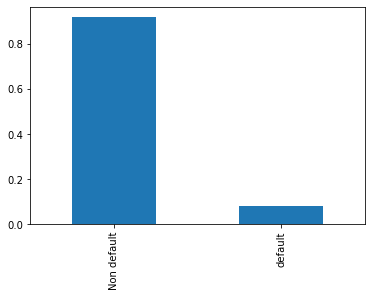

In [76]:
###pie chart to display the target_var
NewApp.TARGET_VAR.value_counts(normalize=True).plot.bar()
plt.show()


In [77]:
NewApp.NAME_EDUCATION_TYPE.value_counts()

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

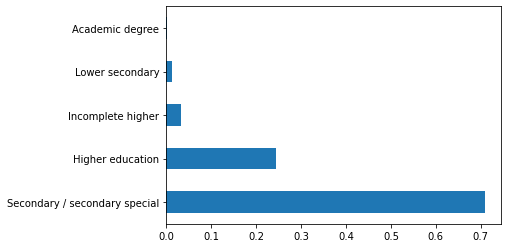

In [78]:
###plotting a bar plot for education type.
NewApp.NAME_EDUCATION_TYPE.value_counts(normalize = True ).plot.barh()
plt.show()

In [79]:
NewApp.NAME_INCOME_TYPE.value_counts(normalize = True)*100

Working                 51.631974
Commercial associate    23.289248
Pensioner               18.003258
State servant            7.057634
Unemployed               0.007154
Student                  0.005853
Businessman              0.003252
Maternity leave          0.001626
Name: NAME_INCOME_TYPE, dtype: float64

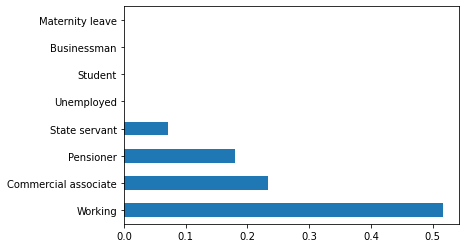

In [80]:
NewApp.NAME_INCOME_TYPE.value_counts(normalize = True ).plot.barh()
plt.show()

In [81]:

NewApp.NAME_FAMILY_STATUS.value_counts(normalize = True)*100

Married      73.560621
Single       14.778008
Separated     6.429038
Widow         5.231683
Unknown       0.000650
Name: NAME_FAMILY_STATUS, dtype: float64

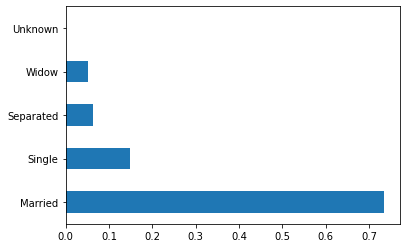

In [82]:
###bar plot for family status variable

NewApp.NAME_FAMILY_STATUS.value_counts(normalize = True).plot.barh()
plt.show()

In [83]:
NewApp.OCCUPATION_TYPE.value_counts(normalize = True)*100

Laborers                 26.139636
Sales staff              15.205570
Core staff               13.058924
Managers                 10.122679
Drivers                   8.811576
High skill tech staff     5.390299
Accountants               4.648067
Medicine staff            4.043672
Security staff            3.183498
Cooking staff             2.816408
Cleaning staff            2.203960
Private service staff     1.256158
Low-skill Laborers        0.991379
Waiters/barmen staff      0.638499
Secretaries               0.618132
Realty agents             0.355722
HR staff                  0.266673
IT staff                  0.249147
Name: OCCUPATION_TYPE, dtype: float64

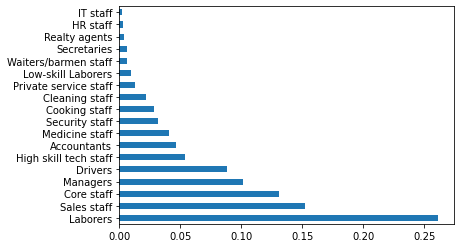

In [84]:
###bar chart for occupation type variable

NewApp.OCCUPATION_TYPE.value_counts(normalize = True).plot.barh()
plt.show()

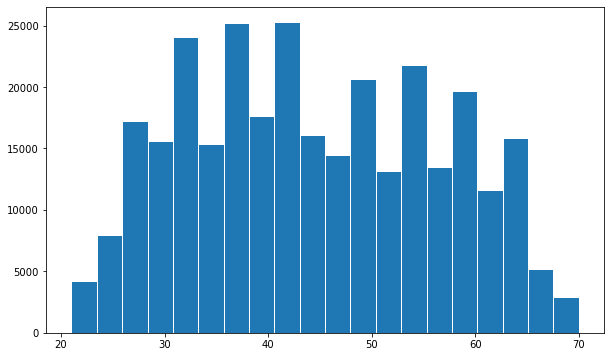

In [85]:
###to make age column more visulaise plotting a histogram
plt.figure(figsize=(10,6))

plt.hist(NewApp.AGE,bins = 20,edgecolor = 'white')

plt.show()

In [86]:
###Previous Application status

PrevApp.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_TYPE_SUITE NAME_CLIENT_TYPE   NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE      CHANNEL_TYPE  SELLERPLACE_AREA  NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP             PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL
205485     2845382      406596     Consumer loans          NaN        30912.750    30912.75             0.000        30912.750                   SATURDAY                       19                           Y                       1           0.000000                    NaN                       NaN                    XAP         Unused offer          -1318  Cash through the bank             CLIENT             NaN        Refreshed                Mobile            XNA               XNA      Country-wide                20          Connectivity          NaN              XNA        POS mobile with interest                 NaN             NaN                        NaN            NaN               NaN                        NaN
717142     2845381      140761     Consumer loans          NaN        41499.000    41499.00             0.000        41499.000                    TUESDAY                       10                           Y                       1           0.000000                    NaN                       NaN                    XAP         Unused offer          -1039  Cash through the bank             CLIENT             NaN         Repeater                Mobile            XNA               XNA      Country-wide                30          Connectivity          NaN              XNA        POS mobile with interest                 NaN             NaN                        NaN            NaN               NaN                        NaN
886179     2845379      237546     Consumer loans     8797.680        79416.900    60673.50         22500.900        79416.900                   THURSDAY                       19                           Y                       1           0.294628                    NaN                       NaN                    XAP              Refused          -1446  Cash through the bank              LIMIT          Family         Repeater  Consumer Electronics            POS               XNA      Country-wide             10000  Consumer electronics          8.0           middle     POS household with interest                 NaN             NaN                        NaN            NaN               NaN                        NaN
359118     2845378      100125     Consumer loans    11269.575        80995.185    59503.50         24299.685        80995.185                     FRIDAY                       18                           Y                       1           0.315794                    NaN                       NaN                    XAP              Refused          -1165  Cash through the bank                SCO          Family              New           Audio/Video            POS               XNA      Country-wide              3318  Consumer electronics          6.0           middle     POS household with interest                 NaN             NaN                        NaN            NaN               NaN                        NaN
70058      2845377      250234     Consumer loans     5009.400       108180.000   108180.00             0.000       108180.000                   THURSDAY                       17                           Y                       1           0.000000                    NaN                       NaN                    XAP              Refused          -

In [87]:
PrevApp.NAME_CONTRACT_STATUS.value_counts(normalize = True)*100

Approved        72.991262
Canceled        13.762738
Refused         11.699035
Unused offer     1.546965
Name: NAME_CONTRACT_STATUS, dtype: float64

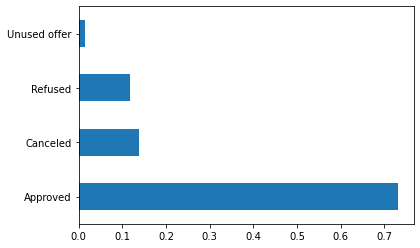

In [88]:
###plotting the bar plot to visualise previous application
PrevApp.NAME_CONTRACT_STATUS.value_counts(normalize = True).plot.barh()
plt.show()


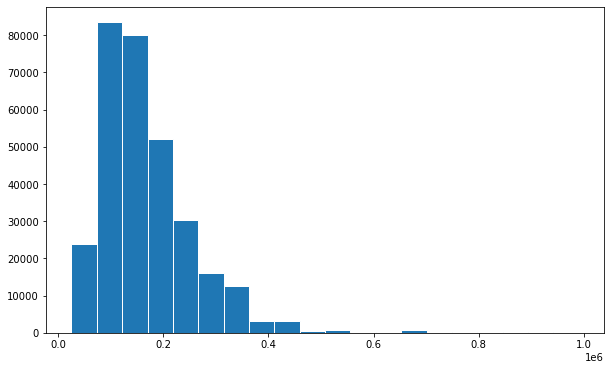

In [89]:
###plotting histogram for AMT_INCOME_TOTAl
plt.figure(figsize=(10,6))
plt.hist(NewApp[NewApp.AMT_INCOME_TOTAL < 10**6].AMT_INCOME_TOTAL, bins=20, edgecolor='White')
plt.show()


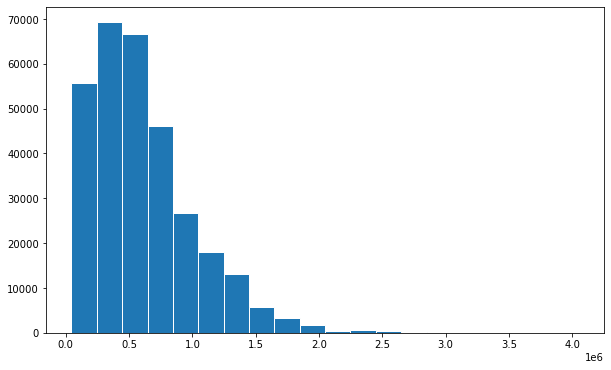

In [90]:
###AMT_CREDIT_x column

plt.figure(figsize=(10,6))
plt.hist(NewApp.AMT_CREDIT_x, bins=20, edgecolor='White')
plt.show()

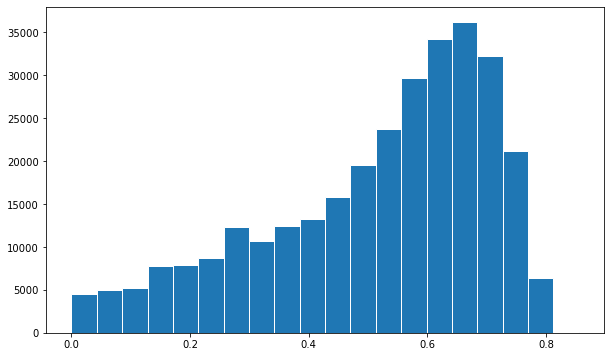

In [91]:
###EXT SOURCE_2 column
plt.figure(figsize=(10,6))
plt.hist(NewApp.EXT_SOURCE_2, bins=20, edgecolor='White')
plt.show()

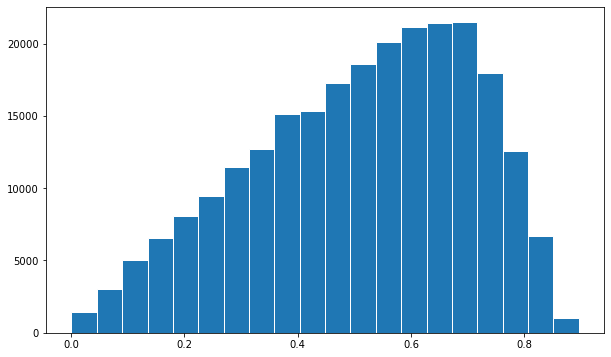

In [92]:
###EXT SOURCE_3 column
plt.figure(figsize=(10,6))
plt.hist(NewApp.EXT_SOURCE_3, bins=20, edgecolor='White')
plt.show()

In [93]:
### owns property

NewApp.FLAG_OWN_REALTY.value_counts(normalize=True)*100

Y    69.367275
N    30.632725
Name: FLAG_OWN_REALTY, dtype: float64

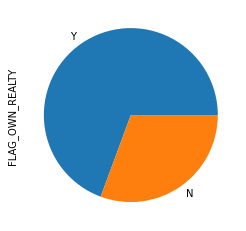

In [94]:
###it is visually understable that most own der property
NewApp.FLAG_OWN_REALTY.value_counts(normalize=True).plot.pie()
plt.show()

### Bivariate Analysis

###Category - category

In [95]:
###NAME FAMILY STATUS - TARGET
NewApp.groupby(['NAME_FAMILY_STATUS'])['TARGET'].mean()

NAME_FAMILY_STATUS
Married      0.078738
Separated    0.081942
Single       0.098077
Unknown      0.000000
Widow        0.058242
Name: TARGET, dtype: float64

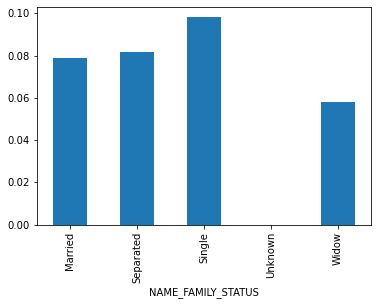

In [96]:
NewApp.groupby(['NAME_FAMILY_STATUS'])['TARGET'].mean().plot.bar()
plt.show()

In [97]:
NewApp.groupby(['OCCUPATION_TYPE'])['TARGET'].mean()*100

OCCUPATION_TYPE
Accountants               4.830327
Cleaning staff            9.606705
Cooking staff            10.443996
Core staff                6.303954
Drivers                  11.326130
HR staff                  6.394316
High skill tech staff     6.159930
IT staff                  6.463878
Laborers                 10.578770
Low-skill Laborers       17.152413
Managers                  6.214028
Medicine staff            6.700246
Private service staff     6.598793
Realty agents             7.856192
Sales staff               9.631799
Secretaries               7.049808
Security staff           10.742449
Waiters/barmen staff     11.275964
Name: TARGET, dtype: float64

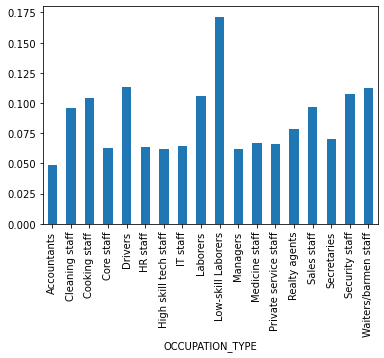

In [98]:
###occupation type vs Target
NewApp.groupby(['OCCUPATION_TYPE'])['TARGET'].mean().plot.bar()
plt.show()

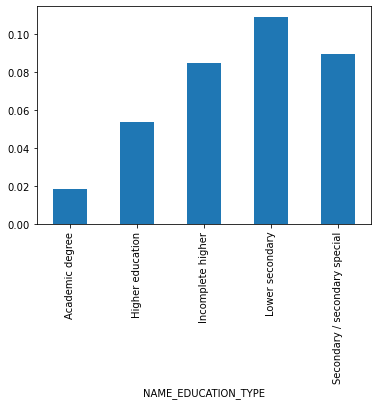

In [99]:
###Education type vs target

NewApp.groupby(['NAME_EDUCATION_TYPE'])['TARGET'].mean().plot.bar()
plt.show()

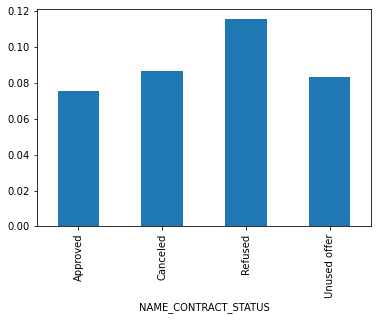

In [100]:
###name_contract_status vs Target

NewApp.groupby(['NAME_CONTRACT_STATUS'])['TARGET'].mean().plot.bar()
plt.show()

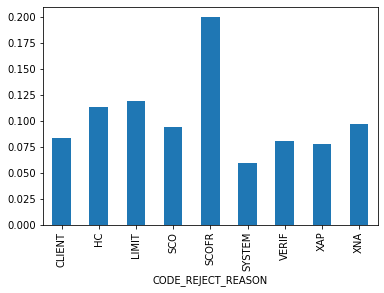

In [101]:
NewApp.groupby(['CODE_REJECT_REASON'])['TARGET'].mean().plot.bar()
plt.show()

## Numeric - Numeric 

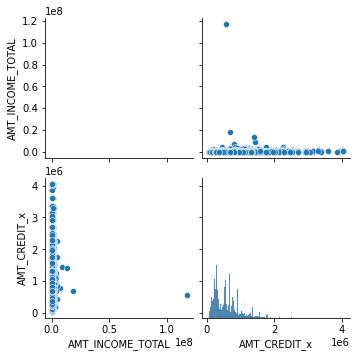

In [102]:
###Total Income vs Amount loan

sns.pairplot(data = NewApp ,vars =["AMT_INCOME_TOTAL","AMT_CREDIT_x"])

plt.show()

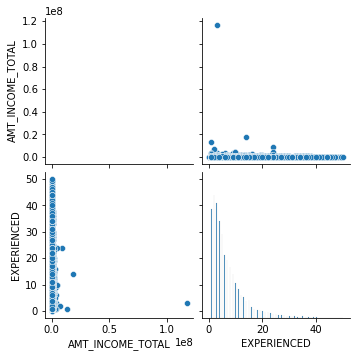

In [141]:
### total income vs experienced

sns.pairplot(data = NewApp ,vars =["AMT_INCOME_TOTAL","EXPERIENCED"])
plt.show()

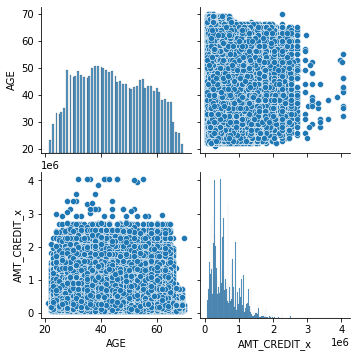

In [142]:
###Age vs loan amount
sns.pairplot(data = NewApp ,vars =["AGE","AMT_CREDIT_x"])
plt.show()

## Numeric - Categorical 

In [140]:
###occupation type vs total income


NewApp.groupby('OCCUPATION_TYPE').AMT_INCOME_TOTAL.mean()

OCCUPATION_TYPE
Accountants              194577.550499
Cleaning staff           130790.895551
Cooking staff            138396.508176
Core staff               172656.695254
Drivers                  187011.606413
HR staff                 188916.282416
High skill tech staff    182842.045683
IT staff                 213465.601711
Laborers                 166357.482525
Low-skill Laborers       133228.001911
Managers                 260327.806503
Medicine staff           149709.643434
Private service staff    182334.812783
Realty agents            195003.994674
Sales staff              152302.874710
Secretaries              160541.662069
Security staff           149662.695953
Waiters/barmen staff     144272.583828
Name: AMT_INCOME_TOTAL, dtype: float64

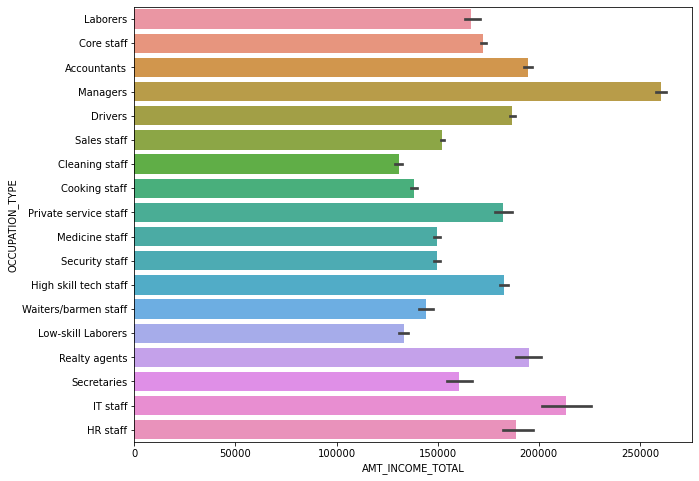

In [139]:
plt.figure(figsize=(10,8))
sns.barplot(NewApp.AMT_INCOME_TOTAL, NewApp.OCCUPATION_TYPE)
plt.show()

In [138]:
###education type of the Applicant vs total_income


NewApp.groupby('NAME_EDUCATION_TYPE').AMT_INCOME_TOTAL.mean()

NAME_EDUCATION_TYPE
Academic degree                  240009.146341
Higher education                 208652.135993
Incomplete higher                181563.812397
Lower secondary                  129995.499869
Secondary / secondary special    155158.512138
Name: AMT_INCOME_TOTAL, dtype: float64

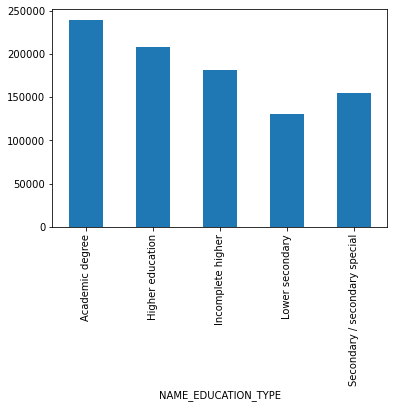

In [137]:
NewApp.groupby('NAME_EDUCATION_TYPE').AMT_INCOME_TOTAL.mean().plot.bar()
plt.show()

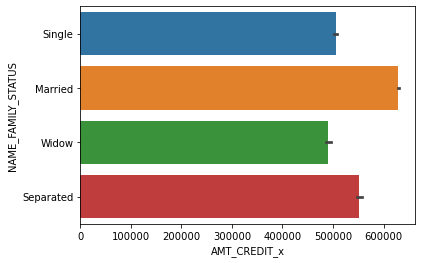

In [136]:
###Marital vs Amount_credit

sns.barplot(NewApp.AMT_CREDIT_x, NewApp.NAME_FAMILY_STATUS)
plt.show()

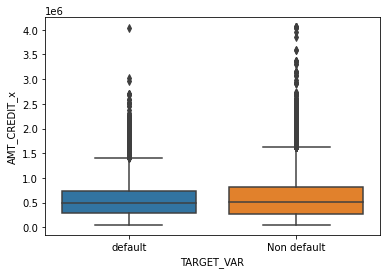

In [135]:
###Target vs loan amount
sns.boxplot(x=NewApp.TARGET_VAR, y=NewApp.AMT_CREDIT_x)
plt.show()

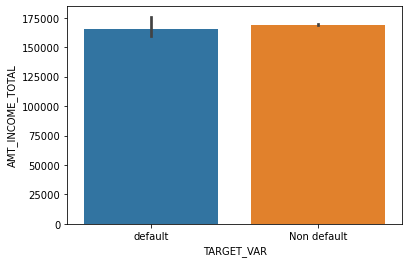

In [134]:
###Total income vs Target

sns.barplot(NewApp.TARGET_VAR,NewApp.AMT_INCOME_TOTAL)
plt.show()

In [133]:
###bucketting the age groups for better visualisation and plotting the bar graph

age_buckets = ['<30','30-40','40-50','50-60','60+']
NewApp['AGE_GROUP'] = pd.cut(NewApp.AGE, [0,30,40,50,60,999], labels=age_buckets)
NewApp['AGE_GROUP'].value_counts(normalize=True)*100

30-40    26.765395
40-50    24.890654
50-60    22.133336
<30      14.640547
60+      11.570068
Name: AGE_GROUP, dtype: float64

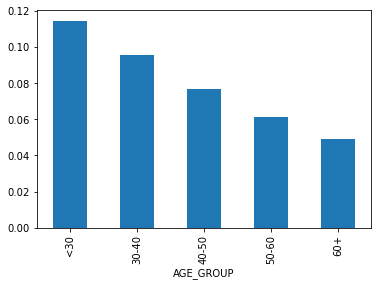

In [132]:
### AGE group vs target

NewApp.groupby('AGE_GROUP').TARGET.mean().plot.bar()
plt.show()


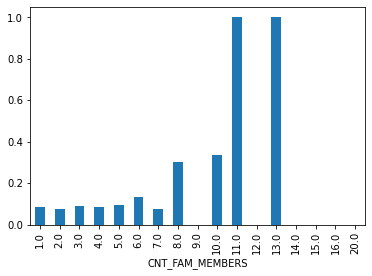

In [131]:
###Family members count vs Target

NewApp.groupby('CNT_FAM_MEMBERS').TARGET.mean().plot.bar()
plt.show()


### Multivariate Analysis

In [130]:
###removing unknown columns from family status
NewApp = NewApp[~(NewApp.NAME_FAMILY_STATUS == 'Unknown')]
NewApp[(NewApp.NAME_FAMILY_STATUS == 'Unknown')]

Empty DataFrame
Columns: [SK_ID_CURR, TARGET, NAME_CONTRACT_TYPE, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT_x, AMT_ANNUITY, AMT_GOODS_PRICE, NAME_TYPE_SUITE, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, REGION_POPULATION_RELATIVE, DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, FLAG_MOBIL, FLAG_EMP_PHONE, FLAG_WORK_PHONE, FLAG_CONT_MOBILE, FLAG_PHONE, FLAG_EMAIL, OCCUPATION_TYPE, CNT_FAM_MEMBERS, REGION_RATING_CLIENT, REGION_RATING_CLIENT_W_CITY, WEEKDAY_APPR_PROCESS_START, HOUR_APPR_PROCESS_START, REG_REGION_NOT_LIVE_REGION, REG_REGION_NOT_WORK_REGION, LIVE_REGION_NOT_WORK_REGION, REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY, LIVE_CITY_NOT_WORK_CITY, ORGANIZATION_TYPE, EXT_SOURCE_2, EXT_SOURCE_3, YEARS_BEGINEXPLUATATION_AVG, FLOORSMAX_AVG, YEARS_BEGINEXPLUATATION_MODE, FLOORSMAX_MODE, YEARS_BEGINEXPLUATATION_MEDI, FLOORSMAX_MEDI, TOTALAREA_MODE, EMERGENCYSTATE_MODE, OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE, DAYS_LAST_PHONE_CHANGE, FLAG_DOCUMENT_2, FLAG_DOCUMENT_3, FLAG_DOCUMENT_4, FLAG_DOCUMENT_5, FLAG_DOCUMENT_6, FLAG_DOCUMENT_7, FLAG_DOCUMENT_8, FLAG_DOCUMENT_9, FLAG_DOCUMENT_10, FLAG_DOCUMENT_11, FLAG_DOCUMENT_12, FLAG_DOCUMENT_13, FLAG_DOCUMENT_14, FLAG_DOCUMENT_15, FLAG_DOCUMENT_16, FLAG_DOCUMENT_17, FLAG_DOCUMENT_18, FLAG_DOCUMENT_19, FLAG_DOCUMENT_20, FLAG_DOCUMENT_21, AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT, AMT_REQ_CREDIT_BUREAU_YEAR, AGE, EXPERIENCED, AMT_CREDIT_y, NAME_CONTRACT_STATUS, CODE_REJECT_REASON, NAME_YIELD_GROUP, DAYS_TERMINATION, TARGET_VAR, AGE_GROUP]
Index: []

In [129]:
###family_status vs occupation_type vs target

res = pd.pivot_table(data=NewApp, index='OCCUPATION_TYPE', columns='NAME_FAMILY_STATUS', values='TARGET')
res

NAME_FAMILY_STATUS      Married  Separated    Single     Widow
OCCUPATION_TYPE                                               
Accountants            0.045846   0.053352  0.058704  0.044521
Cleaning staff         0.097342   0.078652  0.122066  0.067265
Cooking staff          0.101545   0.084135  0.144550  0.059859
Core staff             0.060456   0.057576  0.080491  0.038880
Drivers                0.106101   0.145655  0.147986  0.153153
HR staff               0.056511   0.065217  0.066667  0.200000
High skill tech staff  0.059609   0.061252  0.072008  0.048327
IT staff               0.072674   0.000000  0.060000  0.000000
Laborers               0.101201   0.109462  0.132301  0.069250
Low-skill Laborers     0.164499   0.164835  0.204545  0.041667
Managers               0.059686   0.068750  0.077488  0.043290
Medicine staff         0.068426   0.060514  0.073257  0.038554
Private service staff  0.062396   0.105263  0.061896  0.034483
Realty agents          0.073171   0.115385  0.093960  0.000000
Sales staff            0.095648   0.097902  0.101770  0.077991
Secretaries            0.079511   0.000000  0.059633  0.038462
Security staff         0.100552   0.118834  0.140472  0.086486
Waiters/barmen staff   0.113074   0.070000  0.131653  0.047619

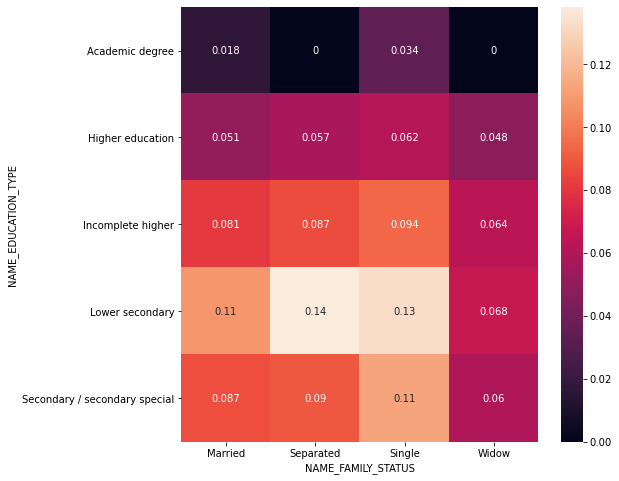

In [128]:
plt.figure(figsize=(8,8))
sns.heatmap(res , annot = True)
plt.show()

In [127]:
###NAME_FAMILY_STATUS vs NAME_EDUCATION_TYPE vs TARGET
res = pd.pivot_table(data=NewApp, index='NAME_EDUCATION_TYPE', columns='NAME_FAMILY_STATUS', values='TARGET')
res

NAME_FAMILY_STATUS              Married  Separated    Single     Widow
NAME_EDUCATION_TYPE                                                   
Academic degree                0.017544   0.000000  0.034483  0.000000
Higher education               0.051481   0.057346  0.062049  0.048094
Incomplete higher              0.081425   0.086643  0.094143  0.063584
Lower secondary                0.108170   0.138249  0.132988  0.067961
Secondary / secondary special  0.087440   0.089904  0.113243  0.059666

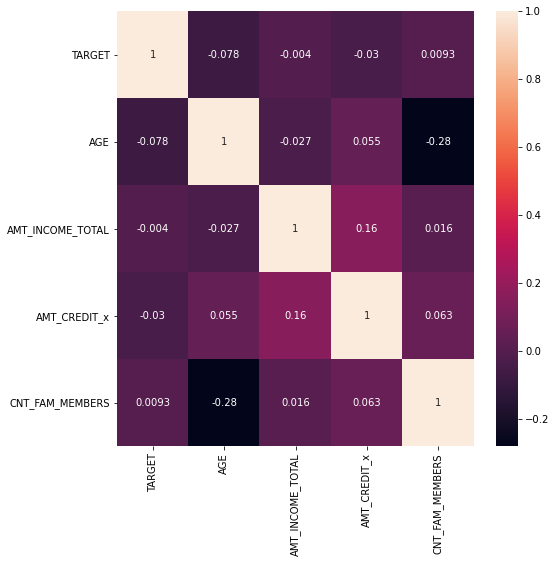

In [126]:
plt.figure(figsize=(8,8))
sns.heatmap(res , annot = True)
plt.show()

### Correlation  of few variables

In [125]:
###correlation  between target and some numeric variables
res = NewApp[['TARGET', 'AGE', 'AMT_INCOME_TOTAL','AMT_CREDIT_x', 'CNT_FAM_MEMBERS']].corr()
res

TARGET       AGE  AMT_INCOME_TOTAL  AMT_CREDIT_x  CNT_FAM_MEMBERS
TARGET            1.000000 -0.078239         -0.003981     -0.030369         0.009308
AGE              -0.078239  1.000000         -0.027244      0.055392        -0.278896
AMT_INCOME_TOTAL -0.003981 -0.027244          1.000000      0.156870         0.016342
AMT_CREDIT_x     -0.030369  0.055392          0.156870      1.000000         0.063160
CNT_FAM_MEMBERS   0.009308 -0.278896          0.016342      0.063160         1.000000

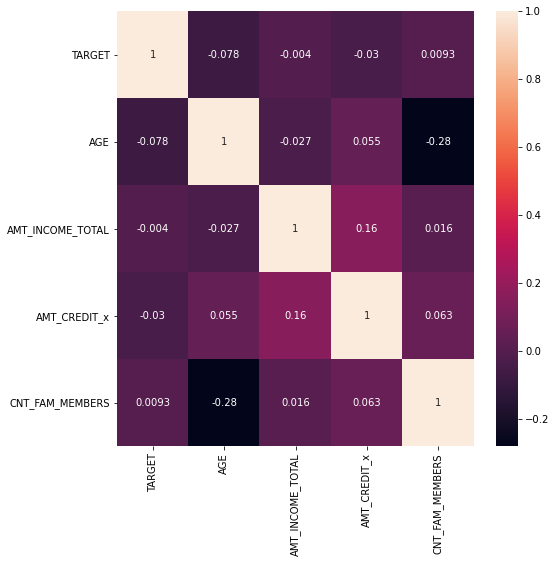

In [124]:
plt.figure(figsize=(8,8))
sns.heatmap(res, annot=True)
plt.show()